## EE 461P: Data Science Principles  
### Homework 2  
### Total points: 95
### Due: Feb 16, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):

1. rdr2793

2 (if applicable).

# Q1. Bias-Variance Trade-off (20 points)

## 1.1 Bias-Variance Decomposition (10 points)
Consider a real-valued function $h(x)$. You were trying to estimate this function using a regression model on the dataset $D$ consisting of $(X, Y)$ pairs. Let the output of the training procedure be another function given by $y(x;D)$. This new function $y(x;D)$ depends on $D$ since it was obtained by regressing on $D$.

To evaluate how well $y(x;D)$ generalizes we are interested in computing the expected error $E_D [(y(x; D) - h(x))^2]$, where the expectation is over all datasets of the same size as $D$, each obtained by i.i.d. sampling from the underlying joint distribution of X and Y. Show that this expected error decomposes into a bias term plus a variance term that you have seen in lecture slides named '2A dsp regression1.pdf'.

Hint: 
Write
$$
  (y(x; D) - h(x))^2 = ( y(x; D) - E_D [y(x; D)] + E_D [y(x; D)] - h(x))^2 = (y(x; D) - E_D [y(x; D)])^2 + (E_D [y(x; D)] - h(x))^2 - 2 (y(x; D) - E_D [y(x; D)]) (E_D [y(x; D)] - h(x))
$$

And take expectation over $D$ on both sides

## 1.2 Bias-Variance Explanation (5 points)
Briefly explain the bias and variance formulas that were derived above and describe how they relate to underfitting/overfitting.

## 1.3 Underfitting vs Overfitting (5 points)
Suppose you have randomly divided the given dataset $D$ into a training dataset and a test dataset. Now you keep on gradually reducing the size of train dataset by moving some points to the test set. As the train set size decreases, what do you
expect will happen to the train and test errors? In your answers, consider both the expected values of these two quantities as well the spread (variance) in the values obtained. Justify briefly.

## Answer:

# Q2. Log-likelihood (10 points)

Consider a linear regression model $y = w.x + ϵ$. Here $x$ is a scalar. The noise  $ϵ$ is IID but depends on $x$ in a way described below:
$$
ϵ_i ∼ N(0, σ^2) \quad \text{if } x_i > 0 
$$
and   
$$
ϵ_i ∼ N(0, 4σ^2) \quad \text{if } x_i \leq 0 
$$
Given $n$ observations ${y_1,y_2, \dots y_n}$, derive the negative log-likelihood term for this assumed generative model. 

## Answer:

# Q3. Model Complexity and Bias/Variance Trade-off (35 points)

3.1 Load the data given in `all_data_q5.npy` using `numpy.load()` function. This dataset contains the train and test datasets in `(x_train, y_train)` and `(x_test, y_test)` respectively. 

Now, fit the polynomial models of degrees 1, 5, and 10 on the training data, and print out the mean squared error for train and test datasets for all the models. Essentially, we are trying to fit linear models of this form: $\hat f(x) = \beta_0 + \beta_1x + \beta_1 x^2 + ... + \beta_px^p$, where $p$ is the degree of the polynomial. (10 points)

Visualise the trained models by making predictions on evenly spaced numbers on x-axis in a fixed range, for eg. you can generate x's by calling `x_all = np.linspace(0, 1, 75).reshape(-1,1)` and call predict on x_all.

In the same figure, add the following plots:

i) Train data plot : y_train vs x_train

ii) Test data plot : y_test vs x_test

All the plots must clearly labeled. (10 points)



**Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train` and you can call `np.vander` inside the fit method of linear regression. 


Make use of the starter code we have provided, and fill the `plot_curves` function.

In [28]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('all_data_q5.npy', allow_pickle=True)
x_train = data_load.item().get("x_train")
y_train = data_load.item().get("y_train")
x_test = data_load.item().get("x_test")
y_test = data_load.item().get("y_test")

lrp = LinearRegression()

In [96]:
print(x_train)

[0.05405405 0.87837838 0.64864865 0.02702703 0.60810811 0.83783784
 0.14864865 0.40540541 0.04054054 0.85135135 0.13513514 0.41891892
 0.51351351 0.74324324 0.01351351 0.43243243 0.97297297 0.18918919
 0.56756757 0.25675676 0.39189189 0.82432432 0.47297297 0.24324324
 0.         0.98648649 0.2027027  0.06756757 0.71621622 0.21621622
 0.68918919 0.27027027 0.93243243 0.10810811 0.17567568 0.33783784
 0.5        0.22972973 0.32432432 0.62162162 0.31081081 0.52702703
 0.78378378 0.16216216 0.48648649 0.28378378 0.12162162 0.95945946
 0.90540541 0.86486486 0.63513514 0.59459459]


In [151]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 1, 5, 10 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
  # degree one
  model = LinearRegression().fit(np.vander(np.squeeze(x_train), 2), y_train)
  y_train_pred = model.predict(np.vander(np.squeeze(x_train), 2))
  y_test_pred = model.predict(np.vander(np.squeeze(x_test), 2))

  train_one = mean_squared_error(y_train, y_train_pred)
  test_one = mean_squared_error(y_test, y_test_pred)
  print("MSE for train data degree one is", train_one)
  print("MSE for test data degree one is", test_one)
  x_all = np.linspace(0,1,75).reshape(-1,1)
  y_all = model.predict(np.vander(np.squeeze(x_all), 2))

  # plt.title("All Values Predicted on (-1,1), degree 1")
  # plt.xlabel("x Values")
  # plt.ylabel("y_values")
  # plt.scatter(x_all, y_all, label="all")
  # plt.show()

  plt.scatter(x_all, y_all, label="all")
  plt.scatter(x_train, y_train,label="train")
  plt.scatter(x_test, y_test,label="test")
  plt.legend(loc="lower left")
  plt.title("Test and Train Plots, degree 1")
  plt.xlabel("x Values")
  plt.ylabel("y_values")
  plt.show()
  
  # degree 5
  model = LinearRegression().fit(np.vander(np.squeeze(x_train), 6), y_train)
  y_train_pred = model.predict(np.vander(np.squeeze(x_train), 6))
  y_test_pred = model.predict(np.vander(np.squeeze(x_test), 6))

  train_five = mean_squared_error(y_train, y_train_pred)
  test_five = mean_squared_error(y_test, y_test_pred)
  print("MSE for train data degree five is", train_five)
  print("MSE for test data degree five is", test_five)
  x_all = np.linspace(0,1,75).reshape(-1,1)
  y_all = model.predict(np.vander(np.squeeze(x_all), 6))

  # plt.title("All Values Predicted on (-1,1), degree 5")
  # plt.xlabel("x Values")
  # plt.ylabel("y_values")
  # plt.scatter(x_all, y_all, label="all")
  # plt.show()

  plt.scatter(x_all, y_all, label="all")
  plt.scatter(x_train, y_train,label="train")
  plt.scatter(x_test, y_test,label="test")
  plt.legend(loc="lower left")
  plt.title("Test and Train Plots, degree 5")
  plt.xlabel("x Values")
  plt.ylabel("y_values")
  plt.show()

  # degree 10
  model = LinearRegression().fit(np.vander(np.squeeze(x_train), 11), y_train)
  y_train_pred = model.predict(np.vander(np.squeeze(x_train), 11))
  y_test_pred = model.predict(np.vander(np.squeeze(x_test), 11))

  train_ten = mean_squared_error(y_train, y_train_pred)
  test_ten = mean_squared_error(y_test, y_test_pred)
  print("MSE for train data degree ten is", train_ten)
  print("MSE for test data degree ten is", test_ten)
  x_all = np.linspace(0,1,75).reshape(-1,1)
  y_all = model.predict(np.vander(np.squeeze(x_all), 11))

  # plt.title("All Values Predicted on (-1,1), degree 10")
  # plt.xlabel("x Values")
  # plt.ylabel("y_values")
  # plt.scatter(x_all, y_all, label="all")
  # plt.show()

  plt.scatter(x_all, y_all, label="all")
  plt.scatter(x_train, y_train,label="train")
  plt.scatter(x_test, y_test,label="test")
  plt.legend(loc="lower left")
  plt.title("Test and Train Plots, degree 10")
  plt.xlabel("x Values")
  plt.ylabel("y_values")
  plt.show()

  return [train_one, train_five, train_ten], [test_one, test_five, test_ten]

def plot_curves_no_out(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 1, 5, 10 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
  # degree one
  model = LinearRegression().fit(np.vander(np.squeeze(x_train), 2), y_train)
  y_train_pred = model.predict(np.vander(np.squeeze(x_train), 2))
  y_test_pred = model.predict(np.vander(np.squeeze(x_test), 2))

  train_one = np.log(np.sqrt(mean_squared_error(y_train, y_train_pred)))
  test_one = np.log(np.sqrt(mean_squared_error(y_test, y_test_pred)))
  # print("MSE for train data degree one is", train_one)
  # print("MSE for test data degree one is", test_one)
  x_all = np.linspace(0,1,75).reshape(-1,1)
  y_all = model.predict(np.vander(np.squeeze(x_all), 2))
  
  # degree 5
  model = LinearRegression().fit(np.vander(np.squeeze(x_train), 6), y_train)
  y_train_pred = model.predict(np.vander(np.squeeze(x_train), 6))
  y_test_pred = model.predict(np.vander(np.squeeze(x_test), 6))

  train_five = np.log(np.sqrt(mean_squared_error(y_train, y_train_pred)))
  test_five = np.log(np.sqrt(mean_squared_error(y_test, y_test_pred)))
  # print("MSE for train data degree five is", train_five)
  # print("MSE for test data degree five is", test_five)
  x_all = np.linspace(0,1,75).reshape(-1,1)
  y_all = model.predict(np.vander(np.squeeze(x_all), 6))

  # degree 10
  model = LinearRegression().fit(np.vander(np.squeeze(x_train), 11), y_train)
  y_train_pred = model.predict(np.vander(np.squeeze(x_train), 11))
  y_test_pred = model.predict(np.vander(np.squeeze(x_test), 11))

  train_ten = np.log(np.sqrt(mean_squared_error(y_train, y_train_pred)))
  test_ten = np.log(np.sqrt(mean_squared_error(y_test, y_test_pred)))
  # print("MSE for train data degree ten is", train_ten)
  # print("MSE for test data degree ten is", test_ten)
  x_all = np.linspace(0,1,75).reshape(-1,1)
  y_all = model.predict(np.vander(np.squeeze(x_all), 11))

  return [train_one, train_five, train_ten], [test_one, test_five, test_ten]

Fit the different polynomials to the training data and make the plots:

MSE for train data degree one is 0.3209424340594463
MSE for test data degree one is 0.3761180477921123


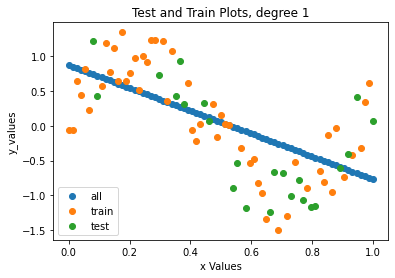

MSE for train data degree five is 0.09698205116425782
MSE for test data degree five is 0.0974084162852407


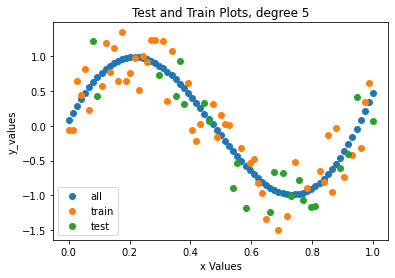

MSE for train data degree ten is 0.07988296881785883
MSE for test data degree ten is 0.2646110853439586


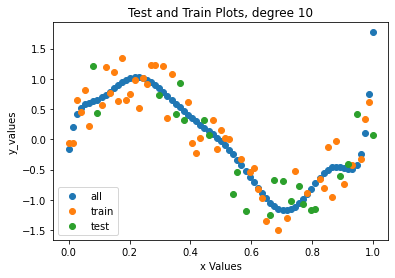

In [148]:
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

3.2 Which model gives the best performance (measured by MSE)? Explain in terms of the bias-variance tradeoff. (5 points)


The model of degree 5 gives the best performance by MSE, since the MSE for the test values are significantly lower than any of the other models. This is because increasing the degree 10 model overfits the data, thus increasing the variance in the prediction for the test data. Similarly, the degree one model underfits the data, increasing the bias error in the prediction.

3.3 Analyse how the training data size affects bias and variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. For each of the three models, plot $log(MSE)$ on train dataset vs the size of the training data and again $log(MSE)$ on test dataset vs the size of the training data. State the trends you see as you change the size of the training data on each of the models and explain why you see them. All plots must be in a single figure and labelled correctly. (10 points)

Study the effects of the training data size on the bias and variance

In [149]:
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves_no_out(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves_no_out(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves_no_out(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves_no_out(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves_no_out(x_train, y_train, x_test, y_test)

plt.scatter()

20% data
40% data
60% data
80% data
100% data


## Answer:

# Q4. Stochastic Gradient Descent (20 points)

4.1 In class you studied about SGD wherein instead of computing the "full" gradient over all data points $\nabla f(w) = \dfrac{1}{N} ∑_{i=1}^{N} \nabla f_i(w)$, you just estimate the gradient based on one randomly selected data point $\nabla f_i(w)$ at a time, and use it to move forward in optimization. Show that this "stochastic gradient" is an unbiased estimator of the full gradient. (10 points)

4.2 Suppose you are using SGD optimization to solve a linear regression problem $y = w^Tx$ to obtain the $w$ that minimizes the mean squared error $E(w) = \dfrac{1}{N} \sum_{i=1}{N} (y_i - w^Tx_i)^2$ . Given that you initialise $w$ as $w_0$, write the one step update equation for $w$. Here $x$ is a vector with $M+1$ components. (10 points)

## Answer:

# Q5. Neural Network Basics (10 points)

5.1 Can a multi-layered neural network with only linear activation functions in all hidden layers be represented as a neural network without any hidden layer? Explain your answer. (5 points)

5.2 Suppose you are solving a problem for image datasets using neural networks. You are wondering if you should use neural network with fully-connected layers or a convolutional neural network. Which one do you think is better suited for this task and why? (Read up on convolutional neural networks if we have not covered this in class by due date). (5 points)



## Answer: